# Stock price Prediction using LSTM network

In [1]:
#import modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime

Data='./data/'

2022-04-28 09:44:00.710187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-28 09:44:00.710250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Collect datasets and save as a dataframe

In [2]:
#download and import dataset gold ons-usd
import pandas_datareader as pdr

ons=pdr.data.DataReader('GC=F',start='2000',data_source='yahoo')
ons.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0.0,273.899994
2000-08-31,278.299988,274.799988,274.799988,278.299988,0.0,278.299988
2000-09-01,277.000000,277.000000,277.000000,277.000000,0.0,277.000000
2000-09-05,275.799988,275.799988,275.799988,275.799988,2.0,275.799988
2000-09-06,274.200012,274.200012,274.200012,274.200012,0.0,274.200012


## Visualizing the fetched data


In [3]:
ons_test=ons.iloc[-720:]
ons_train=ons.iloc[0:ons.shape[0]-720]

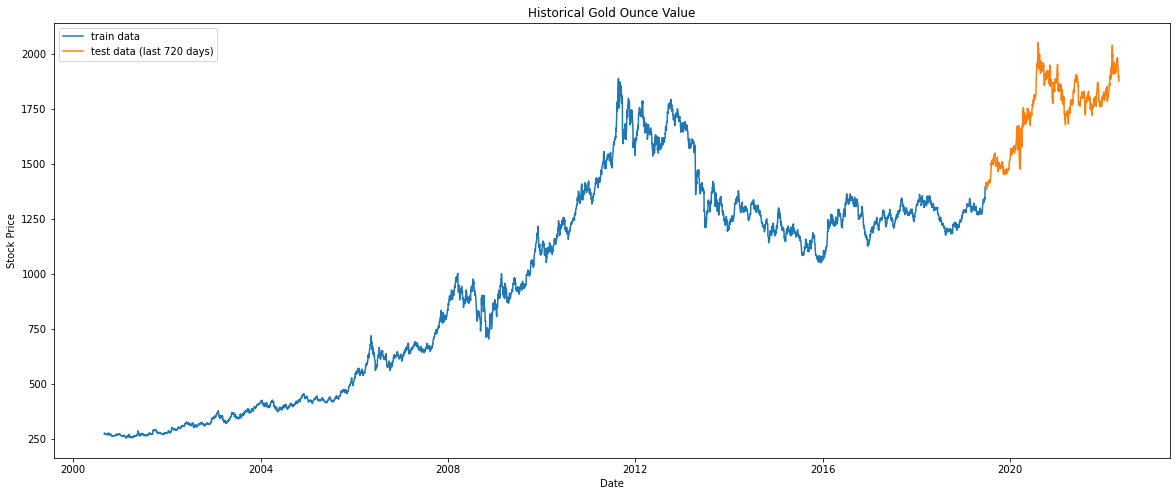

In [4]:
plt.figure(figsize=(20,8))
plt.plot(ons_train['Close'],label='train data')
plt.plot(ons_test['Close'],label='test data (last 720 days)')
plt.title('Historical Gold Ounce Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [5]:
#Data Preprocessing
ons_train['Date'] = ons_train.index
data = pd.DataFrame(columns = ['Date', 'Close'])
data['Date'] = ons_train['Date']
data['Close'] = ons_train['Close']

prediction_days=300
train_set = data.iloc[:,1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for x in range(prediction_days, len(training_set_scaled)):
    X_train.append(training_set_scaled[x - prediction_days:x, 0])
    y_train.append(training_set_scaled[x, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


/tmp/ipykernel_418/2906657241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ons_train['Date'] = ons_train.index


In [6]:
#Defining the LSTM Recurrent Mode
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

2022-04-28 09:44:20.561865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-28 09:44:20.561943: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-28 09:44:20.562030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (noaahhhs-pc): /proc/driver/nvidia/version does not exist
2022-04-28 09:44:20.563829: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 300, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 300, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 300, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 300, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 300, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [7]:
#Compiling and fitting the model
model.compile(optimizer = 'adam', loss = 'root_mean_squared_error')
history=model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
138/138 [==============================] - 127s 868ms/step - loss: 0.0130
Epoch 2/10
138/138 [==============================] - 127s 919ms/step - loss: 0.0029
Epoch 3/10
138/138 [==============================] - 120s 872ms/step - loss: 0.0028
Epoch 4/10
138/138 [==============================] - 127s 922ms/step - loss: 0.0029
Epoch 5/10
138/138 [==============================] - 114s 825ms/step - loss: 0.0022
Epoch 6/10
138/138 [==============================] - 181s 1s/step - loss: 0.0022
Epoch 7/10
138/138 [==============================] - 121s 871ms/step - loss: 0.0020
Epoch 8/10
138/138 [==============================] - 129s 939ms/step - loss: 0.0019
Epoch 9/10
138/138 [==============================] - 131s 949ms/step - loss: 0.0020
Epoch 10/10
138/138 [==============================] - 142s 1s/step - loss: 0.0019


In [8]:
ons_test['Date'] = ons_test.index
testdata = pd.DataFrame(columns = ['Date', 'Close'])
testdata['Date'] = ons_test['Date']
testdata['Close'] = ons_test['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data['Close'], testdata['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - prediction_days:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(prediction_days, len(inputs)):
    X_test.append(inputs[i-prediction_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(720, 300, 1)


/tmp/ipykernel_418/3589861710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ons_test['Date'] = ons_test.index


In [9]:
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

In [10]:
from cmath import sqrt

from sklearn.metrics import mean_squared_error,r2_score
r2=r2_score(real_stock_price,predicted_price) 
rmse=sqrt(mean_squared_error(real_stock_price,predicted_price))/max(real_stock_price)-min(real_stock_price)
print("r2 score: ", r2,"RMSE: ", rmse)

r2 score:  0.9044187346549895 mean_squared_error:  2438.625778912608


In [47]:
percent=0.05
vector=[]
for i in range(0,predicted_price.shape[0]):
    if abs(predicted_price[i] - real_stock_price[i]) <= real_stock_price[i]*percent:
        vector.append(True)
    else:
        vector.append(False)
print("Accuracy: %" ,vector.count(True)/len(vector)*100)

Accuracy: % 93.88888888888889


In [57]:
predicted_price=np.squeeze(predicted_price)
real_stock_price=np.squeeze(real_stock_price)
df=pd.DataFrame({
    "pred":predicted_price,
    "real":real_stock_price,
    

})
df["% diff"]=(abs(df["pred"]-df["real"])/df["real"])*100
df

,pred,real,% diff
0,1346.658813,1414.300049,4.782665
1,1350.690674,1414.900024,4.538084
2,1355.291504,1411.599976,3.988982
3,1360.482056,1408.400024,3.402298
4,1366.171265,1409.699951,3.087798
...,...,...,...
715,1904.252930,1931.000000,1.385141
716,1906.329102,1893.199951,0.693490
717,1907.829346,1901.400024,0.338136
718,1908.506470,1885.900024,1.198709


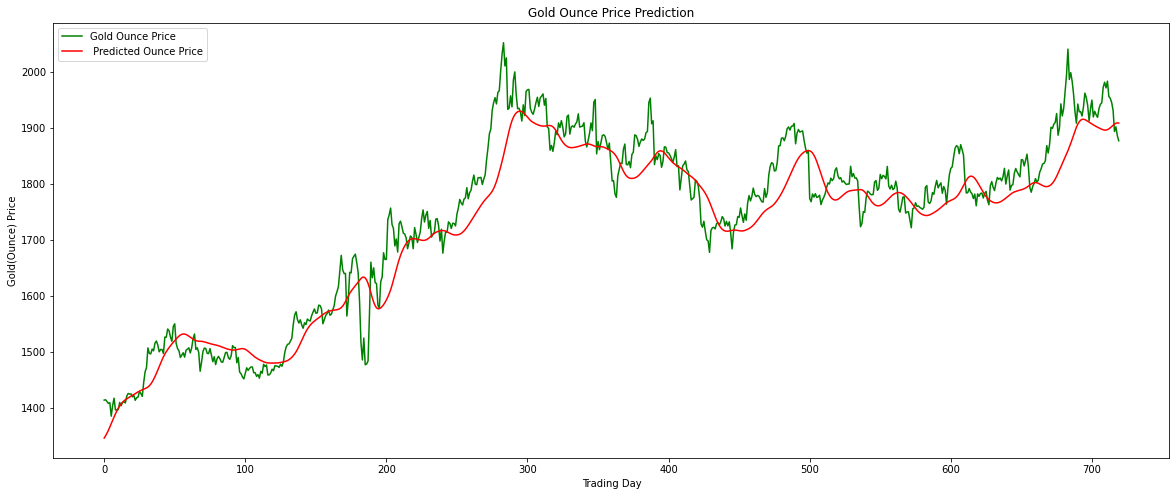

In [58]:
#Visualizing the prediction
plt.figure(figsize=(20,8))
plt.plot(real_stock_price, color = 'green', label = 'Gold Ounce Price')
plt.plot(predicted_price, color = 'red', label = ' Predicted Ounce Price')
plt.title('Gold Ounce Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Gold(Ounce) Price')
plt.legend()
plt.savefig("./outs/gold-prediction-1png")